# Introduction

Decision trees leave you with a difficult decision. A deep tree with lots of leaves will overfit because each prediction is coming from historical data from only the few houses at its leaf. But a shallow tree with few leaves will perform poorly because it fails to capture as many distinctions in the raw data.

Even today's most sophisticated modeling techniques face this tension between underfitting and overfitting. But, many models have clever ideas that can lead to better performance. We'll look at the **random forest** as an example.

The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters. 

# Example

You've already seen the code to load the data a few times. At the end of data-loading, we have the following variables:
- train_X
- val_X
- train_y
- val_y

In [2]:
import pandas as pd
    
# Load data
melbourne_file_path = '../input/melbourne-housing-snapshot/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
# Filter rows with missing values
melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

We build a random forest model similarly to how we built a decision tree in scikit-learn - this time using the `RandomForestRegressor` class instead of `DecisionTreeRegressor`.

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

191669.7536453626


In [20]:
melb_preds

array([ 947155.,  540290.,  976405., ...,  250015., 1224435., 1802110.])

In [16]:
val_y

4850      815000.0
2307      655000.0
10090     957500.0
3645     1330000.0
4930      722000.0
           ...    
8223      520000.0
11190     870000.0
8563      200000.0
1867     1002000.0
8375     1710000.0
Name: Price, Length: 1549, dtype: float64

In [10]:
import matplotlib.pyplot as plt
import numpy as np

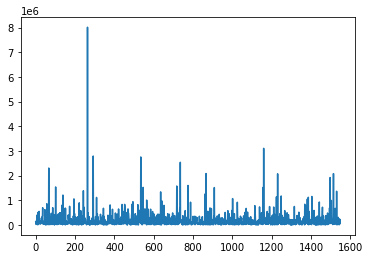

In [34]:
plt.plot(np.arange(1549),abs(melb_preds-val_y))
plt.show()

# Conclusion 
There is likely room for further improvement, but this is a big improvement over the best decision tree error of 250,000. There are parameters which allow you to change the performance of the Random Forest much as we changed the maximum depth of the single decision tree. But one of the best features of Random Forest models is that they generally work reasonably even without this tuning.

# Your Turn 
Try **[Using a Random Forest model](https://www.kaggle.com/kernels/fork/1259186)** yourself and see how much it improves your model.